In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as s
import matplotlib.pyplot as plt
#sns.set(style = 'whitegrid')
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv(r"C:\Users\ASUS\Desktop\Project-Housing_splitted\train.csv")
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
5,1197,60,RL,58.0,14054,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,New,Partial,219210
6,561,20,RL,NaN,11341,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,121500
7,1041,20,RL,88.0,13125,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,1,2006,WD,Normal,155000
8,503,20,RL,70.0,9170,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,400,4,2007,WD,Normal,140000
9,576,50,RL,80.0,8480,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2008,COD,Abnorml,118500


In [3]:
data.shape

(1168, 81)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [5]:
data.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
data.nunique()

Id               1168
MSSubClass         15
MSZoning            5
LotFrontage       106
LotArea           892
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         581
Length: 81, dtype: int64

In [7]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
# Getting total number of NULL values and percentage of the columns
# null_columns = df.columns[df.isna().any()]
null_value_count = data[data.columns[data.isna().any()]].isna().sum().sort_values(ascending=False)
null_percentage = (data[data.columns[data.isna().any()]].isna().sum() * 100 / data.shape[0]).sort_values(ascending=False)


In [9]:
null_data = pd.concat([null_value_count, null_percentage], axis=1, keys=['Count', 'Percentage'])


In [10]:
# Columns with NULL values and % of NULLs are populated in descending order
null_data


,Count,Percentage
PoolQC,1161,99.400685
MiscFeature,1124,96.232877
Alley,1091,93.407534
Fence,931,79.708904
FireplaceQu,551,47.174658
LotFrontage,214,18.321918
GarageType,64,5.479452
GarageYrBlt,64,5.479452
GarageFinish,64,5.479452
GarageQual,64,5.479452


In [11]:
null_data[ null_data['Percentage'] > 15].index


Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
       'LotFrontage'],
      dtype='object')

In [12]:
# Dropping these columns from the dataframe `df`
data.drop(columns=null_data[ null_data['Percentage'] > 15].index, inplace=True)


In [13]:
# Checking Shape
data.shape


(1168, 75)

In [14]:
null_data = null_data[null_data['Percentage'] < 15]
null_data


,Count,Percentage
GarageType,64,5.479452
GarageYrBlt,64,5.479452
GarageFinish,64,5.479452
GarageQual,64,5.479452
GarageCond,64,5.479452
BsmtExposure,31,2.654110
BsmtFinType2,31,2.654110
BsmtCond,30,2.568493
BsmtFinType1,30,2.568493
BsmtQual,30,2.568493


Checking the data in the columns having NULL values < 15%


Countplot to check the occurence of most frequent values in the columns



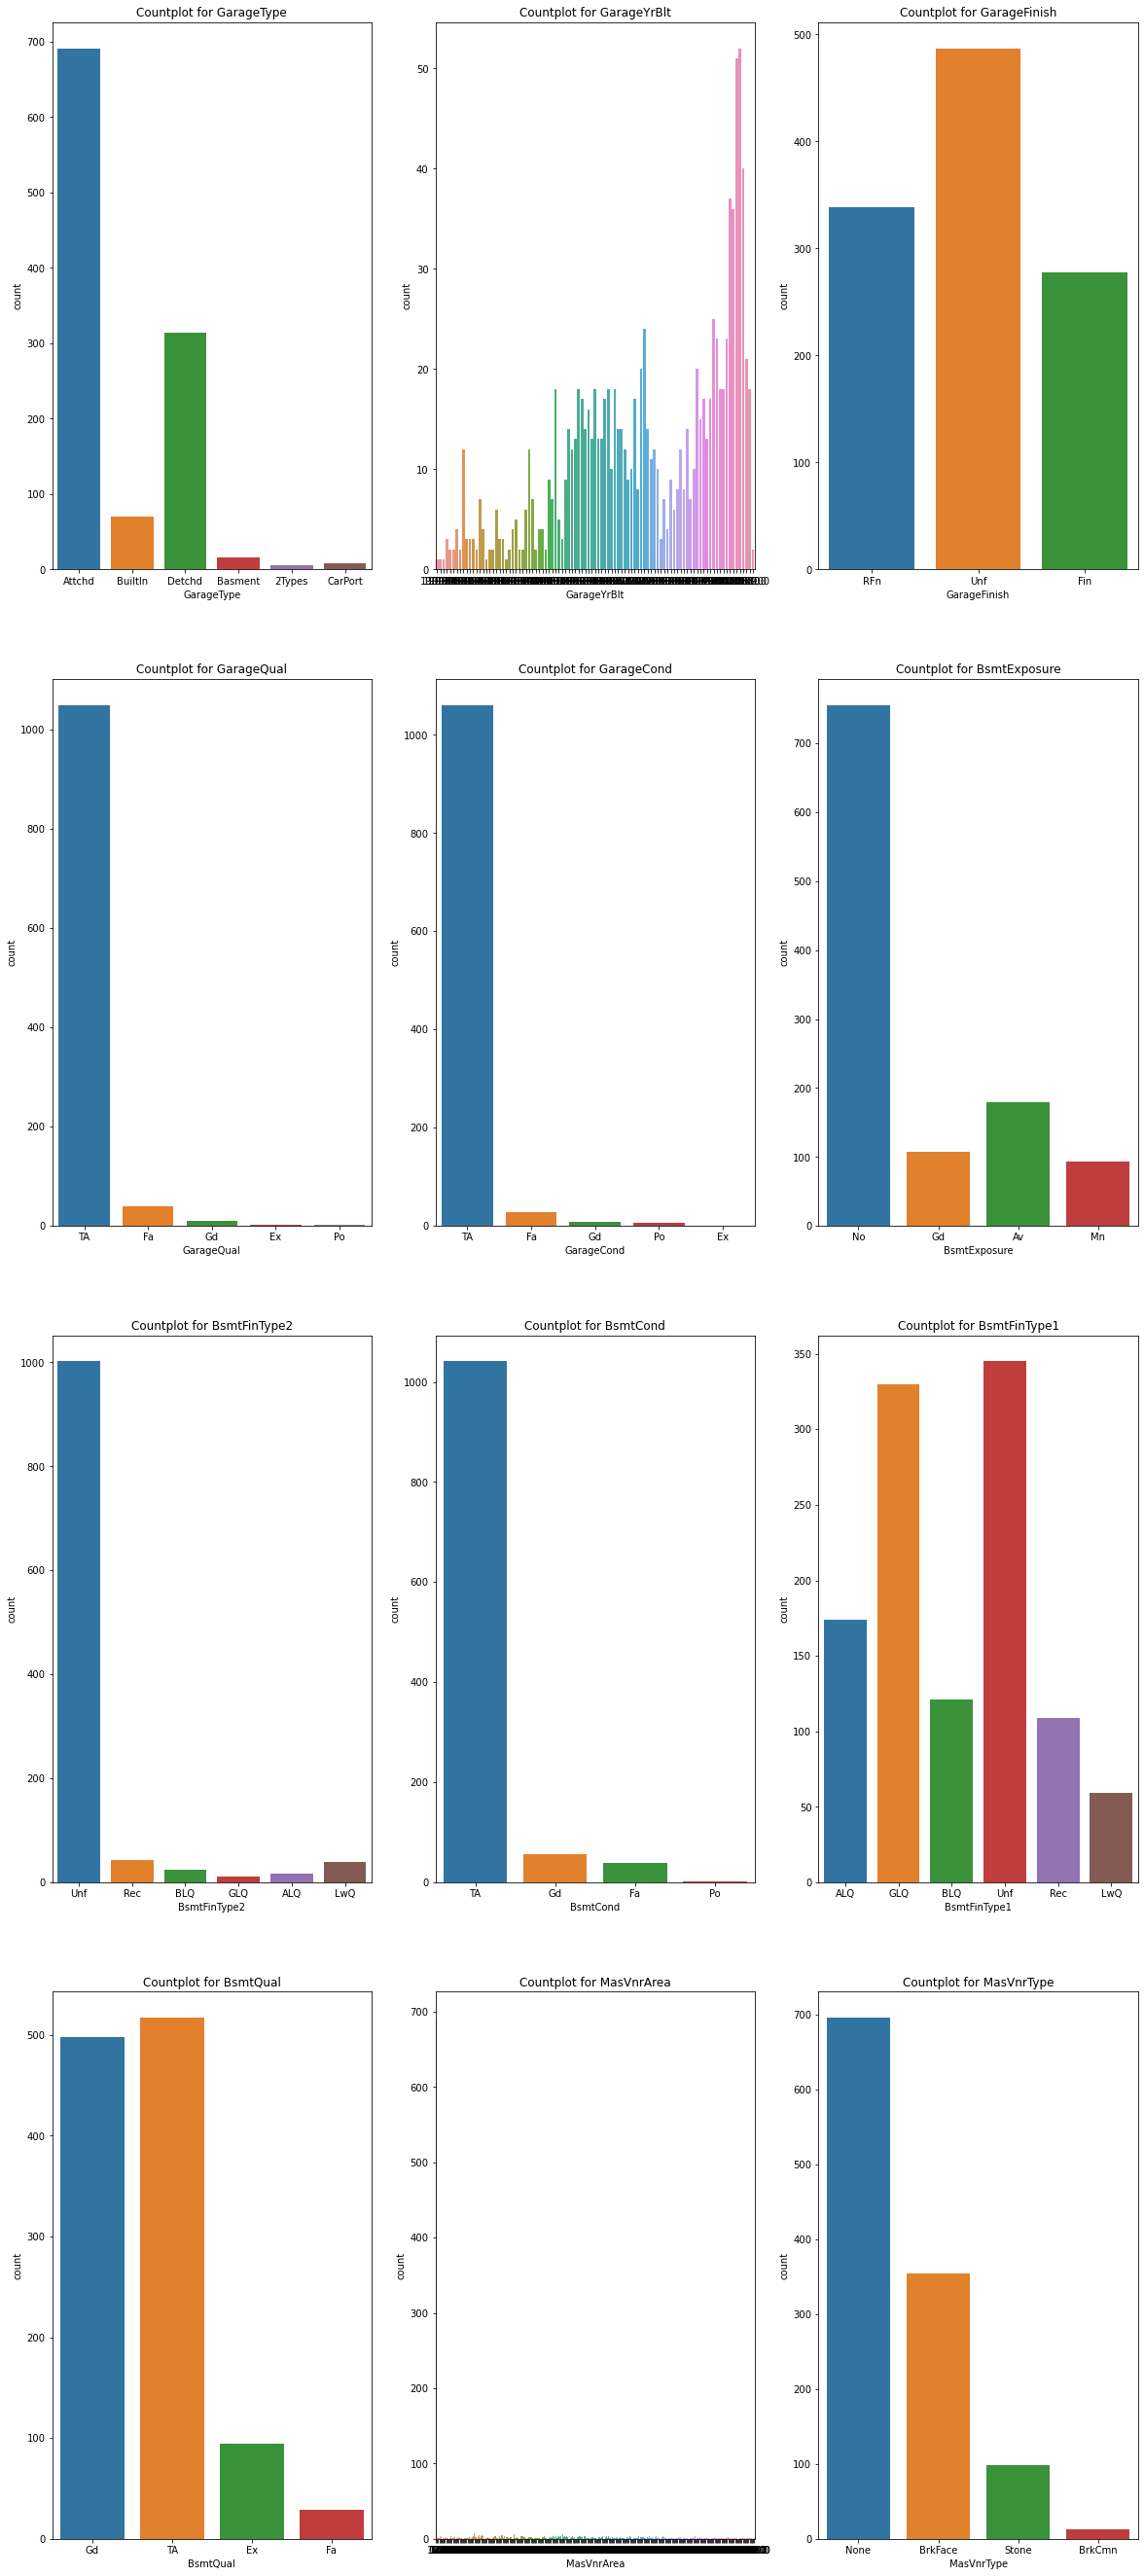

In [15]:
plt.figure(figsize=[20, 60])

for i, var in enumerate(null_data.index,start=1):
    plt.subplot(5,3,i)
    sns.countplot(data[var])
    plt.title(f"Countplot for {var}")


For these columns, we will perform imputation using the below approach:

If the column is categorical, we will use mode() to replace the missing values

If the column is numerical, we will use median() to replace the missing values

If the column value NA has a meaningful value (For e.g. GarageType = NA refers to "No Garage"). We will replace these values with None


In [16]:
# Impute "GarageType" with 'None' as it has a meaningful value
data['GarageType'].fillna('None', inplace=True)


In [17]:
# Impute "GarageYrBlt" with Median value
data['GarageYrBlt'].fillna(data['GarageYrBlt'].median(), inplace=True)


In [18]:
# Impute "GarageFinish" with 'None' as it has a meaningful value
data['GarageFinish'].fillna('None', inplace=True)


In [19]:
# Impute "GarageQual" with 'None' as it has a meaningful value
data['GarageQual'].fillna('None', inplace=True)


In [20]:
# Impute "GarageQual" with 'None' as it has a meaningful value
data['GarageCond'].fillna('None', inplace=True)


In [21]:
# Impute "BsmtExposure" with 'None' as it has a meaningful value
data['BsmtExposure'].fillna('None', inplace=True)


In [22]:
# Impute "BsmtFinType2" with 'None' as it has a meaningful value
data['BsmtFinType2'].fillna('None', inplace=True)


In [23]:
# Impute "BsmtFinType1" with 'None' as it has a meaningful value
data['BsmtFinType1'].fillna('None', inplace=True)


In [24]:
# Impute "BsmtCond" with 'None' as it has a meaningful value
data['BsmtCond'].fillna('None', inplace=True)


In [25]:
# Impute "BsmtQual" with 'None' as it has a meaningful value
data['BsmtQual'].fillna('None', inplace=True)


In [26]:
# Impute "MasVnrArea" with Median value
data['MasVnrArea'].fillna(data['MasVnrArea'].median(), inplace=True)


In [27]:
# Impute "MasVnrType" with Mode value
data['MasVnrType'].fillna(data['MasVnrType'].mode()[0], inplace=True)


In [28]:
# Impute "Electrical" with Mode value
val = data['Electrical'].mode()[0]
data['Electrical'].fillna(val, inplace=True)


Running the NULL value check again to see if there are any null values left over



In [29]:
null_value_count = data[data.columns[data.isna().any()]].isna().sum().sort_values(ascending=False)
null_percentage = (data[data.columns[data.isna().any()]].isna().sum() * 100 / data.shape[0]).sort_values(ascending=False)
null_data = pd.concat([null_value_count, null_percentage], axis=1, keys=['Count', 'Percentage'])
null_data


,Count,Percentage


Dropping unimportant columns

We will be dropping the columns based on:

If the variance in the column is very less, then it provides little scope for the model to learn. We will be dropping these columns

Few columns are not important such as Id as they don't provide any meaningful insights. We will remove these as well


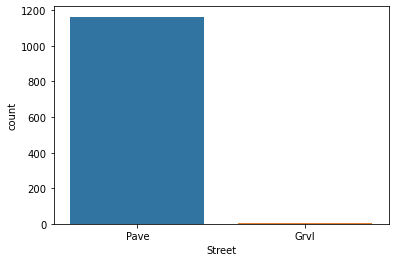

In [30]:
# Dropping "Street" as it doesn't contain much variance. Most values are assigned to "Pave"
sns.countplot(data['Street'])
data.drop(columns='Street', inplace=True)


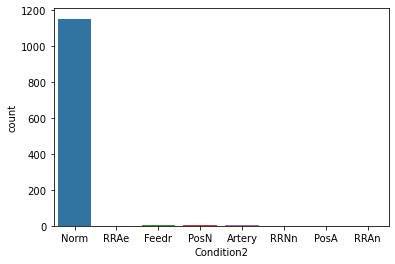

In [31]:
# Dropping "Condition2" as it doesn't contain much variance. Most values are assigned to "Norm"
sns.countplot(data['Condition2'])
data.drop(columns='Condition2', inplace=True)


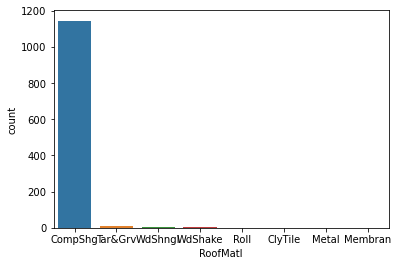

In [32]:
# Dropping "RoofMatl" as it doesn't contain much variance. Most values are assigned to "CompShg"
sns.countplot(data['RoofMatl'])
data.drop(columns='RoofMatl', inplace=True)


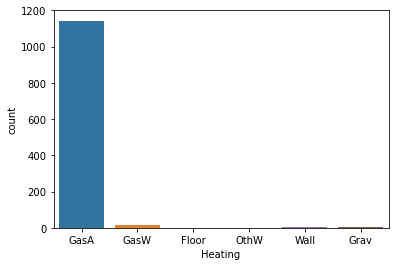

In [33]:
# Dropping "Heating" as it doesn't contain much variance. Most values are assigned to "GasA"
sns.countplot(data['Heating'])
data.drop(columns='Heating', inplace=True)


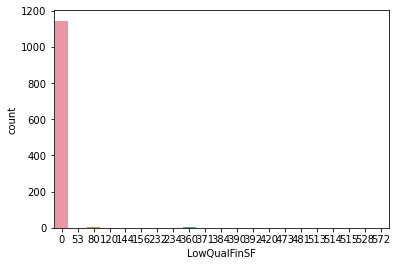

In [34]:
# Dropping "LowQualFinSF" as it doesn't contain much variance. Most values are assigned to "0"
sns.countplot(data['LowQualFinSF'])
data.drop(columns='LowQualFinSF', inplace=True)


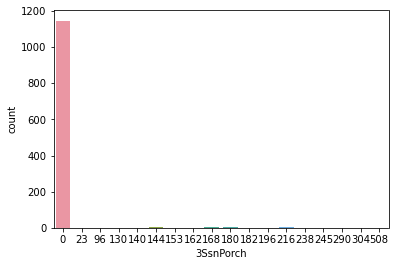

In [35]:
# Dropping "3SsnPorch" as it doesn't contain much variance. Most values are assigned to "0"
sns.countplot(data['3SsnPorch'])
data.drop(columns='3SsnPorch', inplace=True)


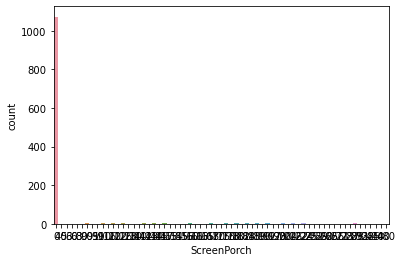

In [36]:
# Dropping "ScreenPorch" as it doesn't contain much variance. Most values are assigned to "0"
sns.countplot(data['ScreenPorch'])
data.drop(columns='ScreenPorch', inplace=True)


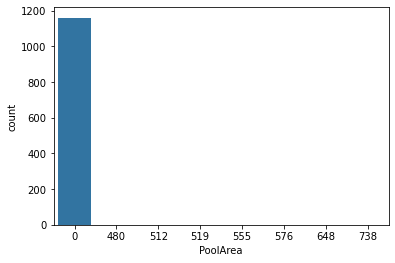

In [37]:
# Dropping "PoolArea" as it doesn't contain much variance. Most values are assigned to "0"
sns.countplot(data['PoolArea'])
data.drop(columns='PoolArea', inplace=True)


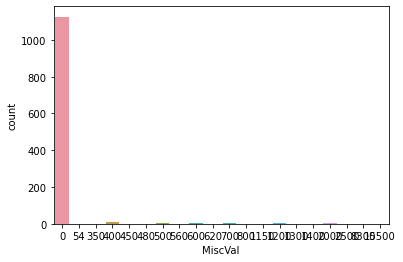

In [38]:
# Dropping "MiscVal" as it doesn't contain much variance. Most values are assigned to "0"
sns.countplot(data['MiscVal'])
data.drop(columns='MiscVal', inplace=True)


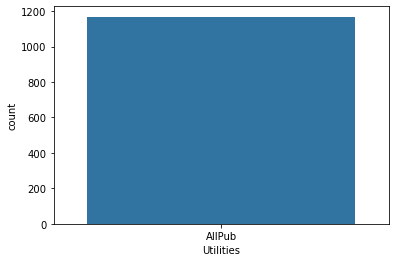

In [39]:
# Dropping "Utilities" as it doesn't contain much variance. Most values are assigned to "AllPub"
sns.countplot(data['Utilities'])
data.drop(columns='Utilities', inplace=True)


In [40]:
# Dropping "Id" columns as it's not important
data.drop(columns='Id', inplace=True)


In [41]:
data.shape

(1168, 64)

In [42]:
data.head(10)

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,RL,4928,IR1,Lvl,Inside,Gtl,NPkVill,Norm,TwnhsE,...,TA,Y,0,205,0,2,2007,WD,Normal,128000
1,20,RL,15865,IR1,Lvl,Inside,Mod,NAmes,Norm,1Fam,...,TA,Y,81,207,0,10,2007,WD,Normal,268000
2,60,RL,9920,IR1,Lvl,CulDSac,Gtl,NoRidge,Norm,1Fam,...,TA,Y,180,130,0,6,2007,WD,Normal,269790
3,20,RL,11751,IR1,Lvl,Inside,Gtl,NWAmes,Norm,1Fam,...,TA,Y,0,122,0,1,2010,COD,Normal,190000
4,20,RL,16635,IR1,Lvl,FR2,Gtl,NWAmes,Norm,1Fam,...,TA,Y,240,0,0,6,2009,WD,Normal,215000
5,60,RL,14054,IR1,Lvl,Inside,Gtl,Gilbert,Norm,1Fam,...,TA,Y,100,17,0,11,2006,New,Partial,219210
6,20,RL,11341,IR1,Lvl,Inside,Gtl,Sawyer,Norm,1Fam,...,TA,Y,0,0,0,5,2010,WD,Normal,121500
7,20,RL,13125,Reg,Lvl,Corner,Gtl,Sawyer,Norm,1Fam,...,TA,Y,0,0,0,1,2006,WD,Normal,155000
8,20,RL,9170,Reg,Lvl,Corner,Gtl,Edwards,Feedr,1Fam,...,Fa,Y,0,0,184,4,2007,WD,Normal,140000
9,50,RL,8480,Reg,Lvl,Inside,Gtl,NAmes,Norm,1Fam,...,TA,Y,158,0,102,10,2008,COD,Abnorml,118500


Handling Year columns

We have 4 year columns. With this, we will create Age columns that track the time in year and remove these columns.

Age will be calculated by subtracting the Year from the current Year for each column.

YearBuilt

YearRemodAdd

GarageYrBlt

YrSold


In [43]:
CurrentYear = 2022


In [44]:
data['Age_Built_Years'] = CurrentYear - data['YearBuilt']


In [45]:
data['Age_RemodAdd_Years'] = CurrentYear - data['YearRemodAdd']


In [46]:
data['Age_GarageYrBlt_Years'] = CurrentYear - data['GarageYrBlt']


In [47]:
data['Age_YrSold_Years'] = CurrentYear - data['YrSold']


We will now proceed with dropping all Year columns



In [48]:
data.drop(columns=['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'], inplace=True)


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 64 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MSSubClass             1168 non-null   int64  
 1   MSZoning               1168 non-null   object 
 2   LotArea                1168 non-null   int64  
 3   LotShape               1168 non-null   object 
 4   LandContour            1168 non-null   object 
 5   LotConfig              1168 non-null   object 
 6   LandSlope              1168 non-null   object 
 7   Neighborhood           1168 non-null   object 
 8   Condition1             1168 non-null   object 
 9   BldgType               1168 non-null   object 
 10  HouseStyle             1168 non-null   object 
 11  OverallQual            1168 non-null   int64  
 12  OverallCond            1168 non-null   int64  
 13  RoofStyle              1168 non-null   object 
 14  Exterior1st            1168 non-null   object 
 15  Exte

After manual inspection of each column, we find that all columns are mapped to the right data types



In [50]:
# Getting categorical variables
cat_var = data.select_dtypes(include='object').columns
cat_var


Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [51]:
# Getting numerical variables
num_var = data.select_dtypes(exclude='object').columns
num_var


Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'MoSold', 'SalePrice', 'Age_Built_Years',
       'Age_RemodAdd_Years', 'Age_GarageYrBlt_Years', 'Age_YrSold_Years'],
      dtype='object')

Checking the distribution of the target variable SalePrice

<Figure size 1440x1080 with 0 Axes>

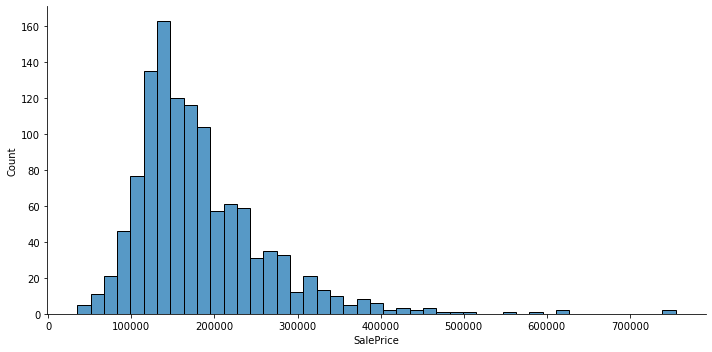

In [52]:
plt.figure(figsize=[20,15])
sns.displot(data['SalePrice'], aspect=2)
plt.show()


Note

Looking at the distribution, we can see that the distribution is skewed towards the right (i.e. outliers on data with high Sales Price). This indicates the presence of outliers.
In such cases, we cannot cap the values as Linear Regression models are interpolated and not extrapolated (i.e. Model will make wrong predictions in case of high Sales Prices).


Checking skew value of SalePrice

In [53]:
data['SalePrice'].skew()


1.953877705368286

Handling SalePrice high skewness

To handle this, we will perform Log Transformation on "SalePrice" column. This will transform the variable and make it as normally distributed as possible. Basically it reduces the skewness in the data.



<Figure size 1440x1080 with 0 Axes>

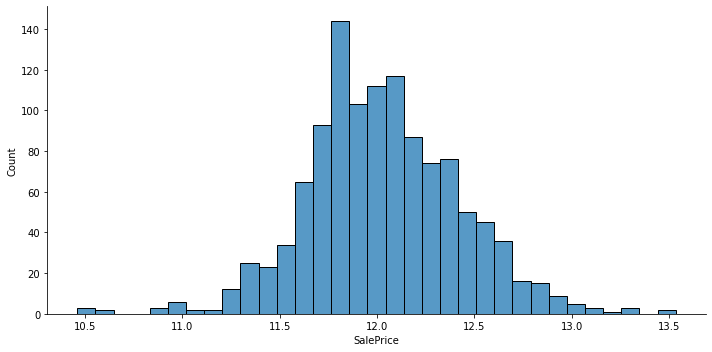

In [54]:
# Plotting distribution of a log transformed "SalePrice" column
plt.figure(figsize=[20,15])
sns.displot(np.log(data['SalePrice']), aspect=2)
plt.show()


Now the data follows more or less a normal distribution



In [55]:
# Create Log Transformed "SalePrice" column
data['Transformed_SalePrice'] = np.log(data['SalePrice'])


<Figure size 1440x1080 with 0 Axes>

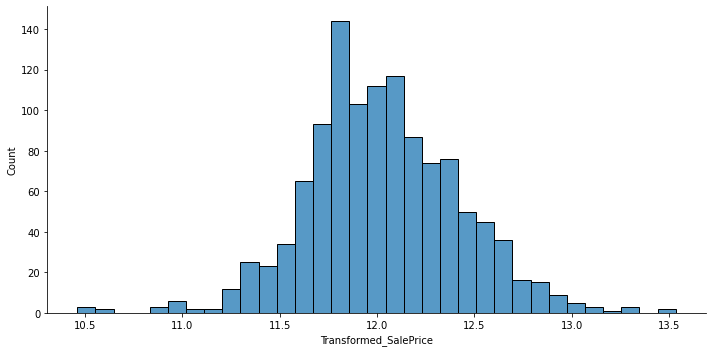

In [56]:
# Plotting distribution of a "Transformed_SalePrice" column
plt.figure(figsize=[20,15])
sns.displot(data['Transformed_SalePrice'], aspect=2)
plt.show()


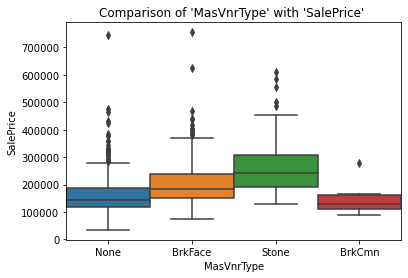

In [57]:
var = 'MasVnrType'
sns.boxplot(x=var, y='SalePrice', data=data, width=1)
plt.title(f"Comparison of '{var}' with 'SalePrice' ")
plt.show()


Stone Masonry Veneer Type has higher median Sales Price compared to other Veneer Types



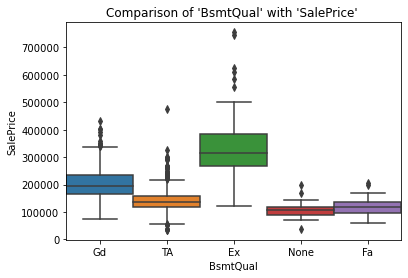

In [58]:
var = 'BsmtQual'
sns.boxplot(x=var, y='SalePrice', data=data, width=1)
plt.title(f"Comparison of '{var}' with 'SalePrice' ")
plt.show()


As Basement quality increases from Fair to Excellent, we see a corresponding increase in SalePrice



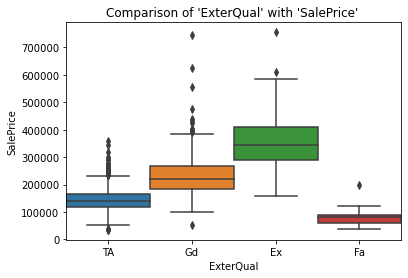

In [59]:
var = 'ExterQual'
sns.boxplot(x=var, y='SalePrice', data=data, width=1)
plt.title(f"Comparison of '{var}' with 'SalePrice' ")
plt.show()


As Exterior quality increases from Fair to Excellent, we see a corresponding increase in SalePrice



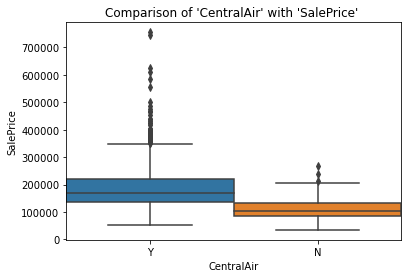

In [60]:
var = 'CentralAir'
sns.boxplot(x=var, y='SalePrice', data=data, width=1)
plt.title(f"Comparison of '{var}' with 'SalePrice' ")
plt.show()


Houses with Central Air conditioning have a higher median price compared to the houses that don't have Central Air conditioning



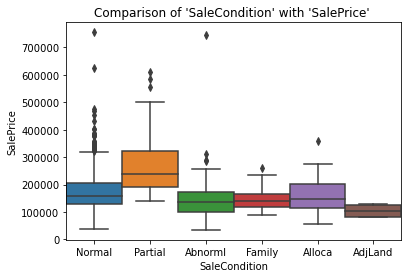

In [61]:
var = 'SaleCondition'
sns.boxplot(x=var, y='SalePrice', data=data, width=1)
plt.title(f"Comparison of '{var}' with 'SalePrice' ")
plt.show()


Houses that are partially completed have a higher median Saleprice compared to other categories. This might be because partially completed houses are usually new houses under construction.



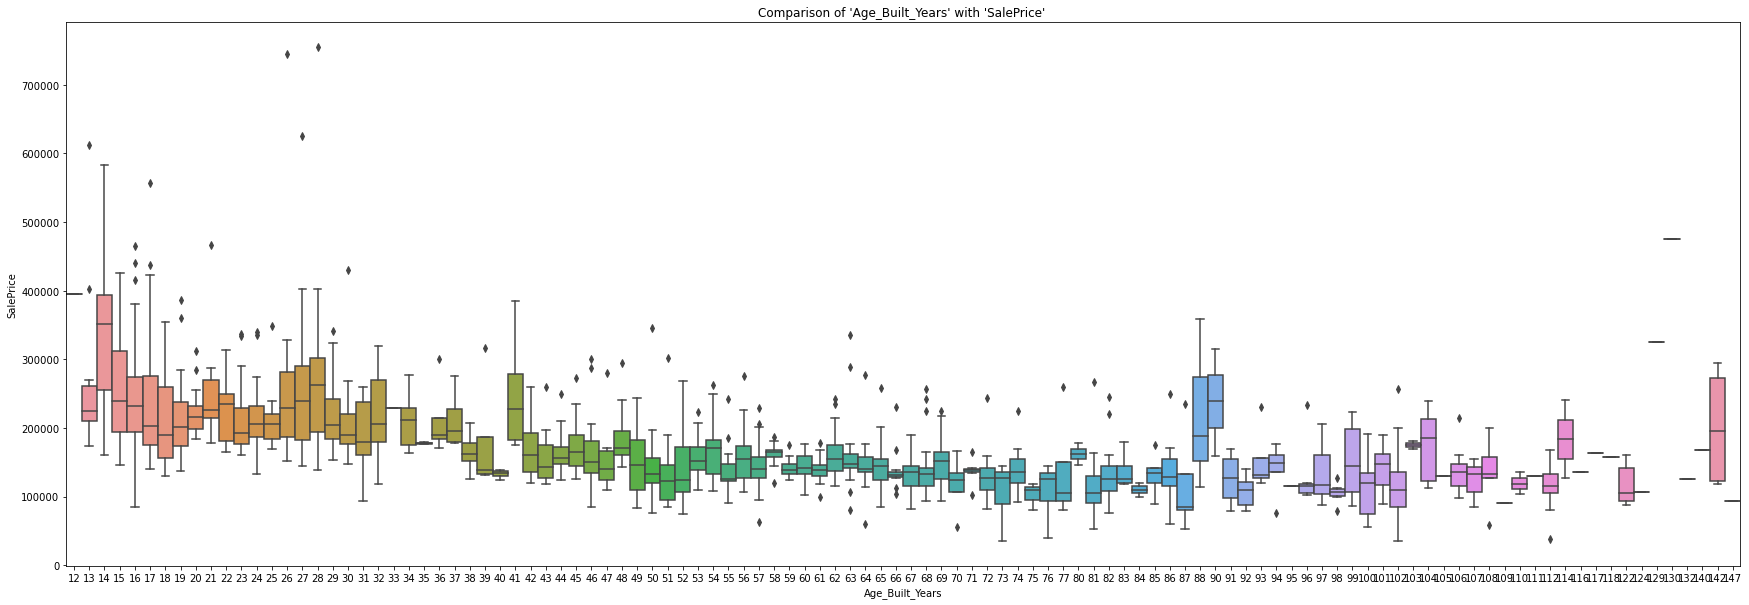

In [62]:
plt.figure(figsize=[30,10])
var = 'Age_Built_Years'
sns.boxplot(x=var, y='SalePrice', data=data, width=1)
plt.title(f"Comparison of '{var}' with 'SalePrice' ")
plt.show()


As the house age increases, we can see that the median SalePrice drops but there are few cases where the SalePrice goes up as well



Creating a correlation matrix and heatmap

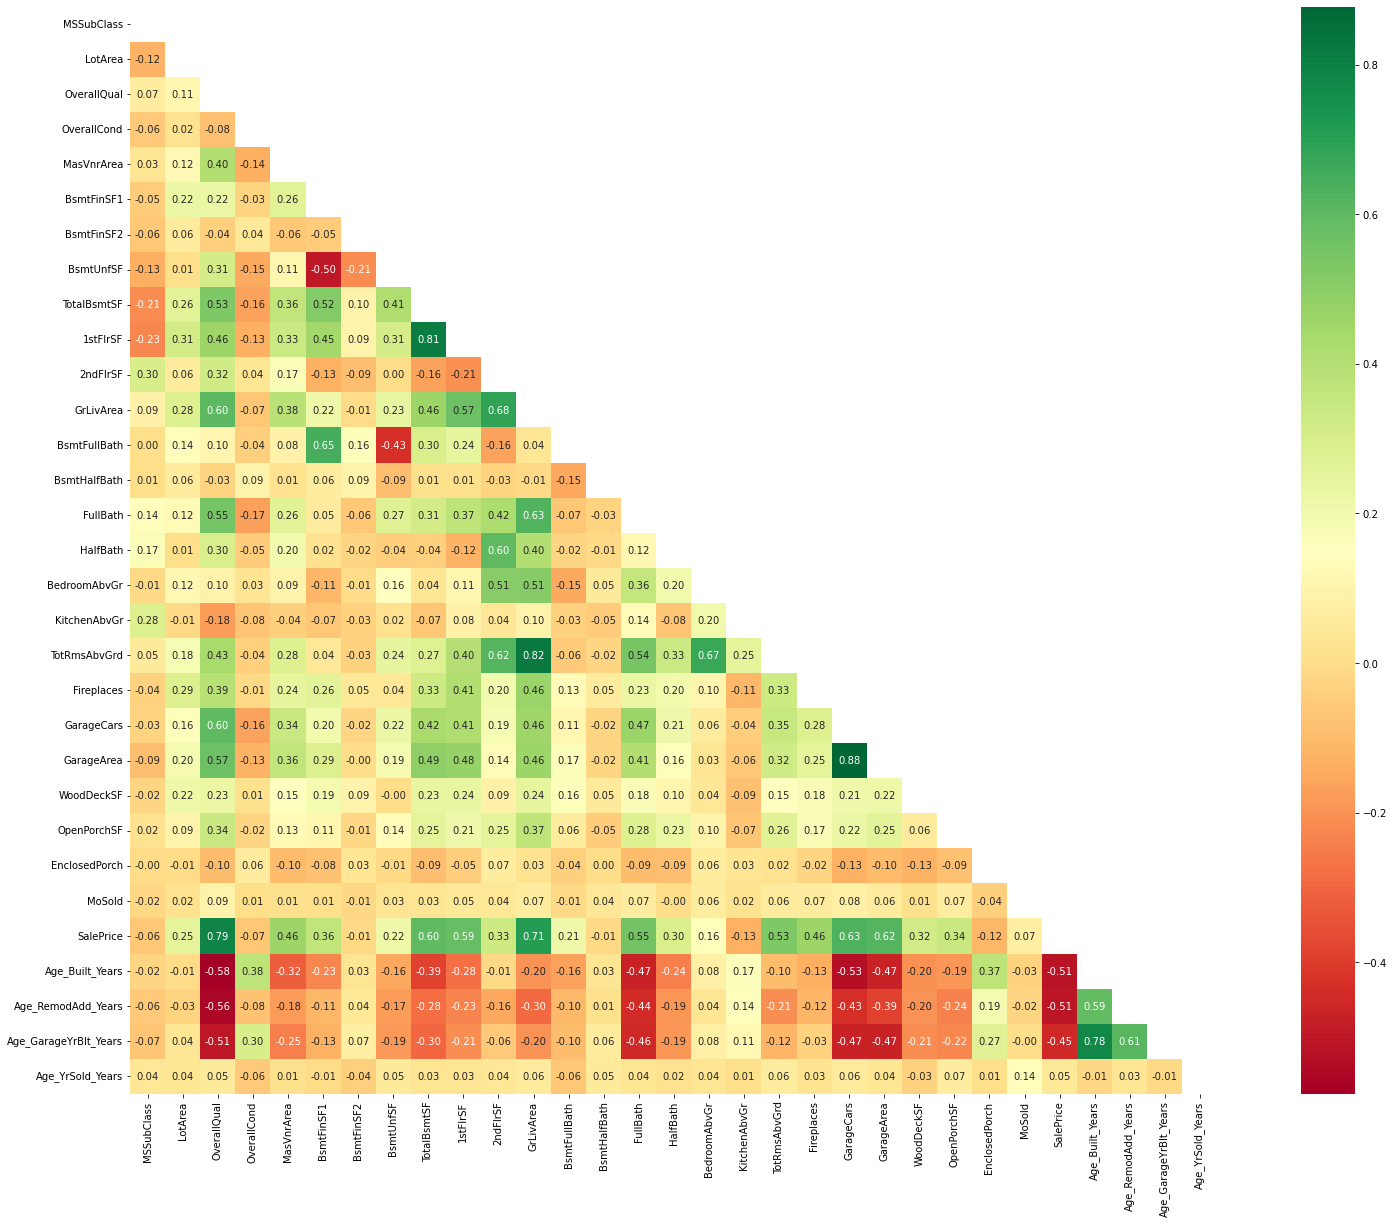

In [63]:
plt.figure(figsize=[30,20])
corr = data.drop(columns='Transformed_SalePrice', axis=1)
corr = corr.corr()
mask=np.triu(np.ones_like(corr)) # Masking upper half of the triangle
sns.heatmap(corr, cmap='RdYlGn', annot=True, fmt='.2f', square=True, mask=mask)
plt.show()


From this list, we will be picking the top 10 most correlated variables with SalePrice



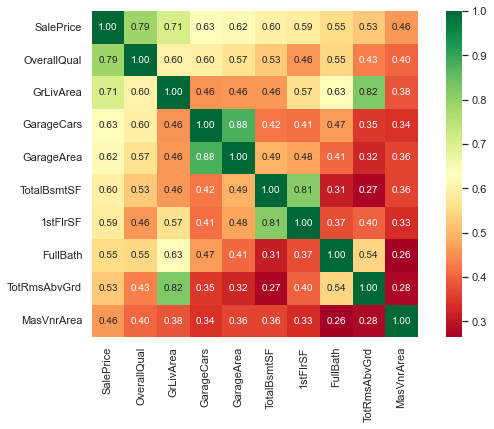

In [64]:
plt.figure(figsize=[10,6])

k = 10 # number of variables for a heatmap
cols = corr.nlargest(k,'SalePrice')['SalePrice'].index
corrmatrix = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(corrmatrix, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10},
                yticklabels=cols.values, xticklabels=cols.values, cmap='RdYlGn')
plt.show()


We can see that:

GrLivArea and TotaRmsAvbGrad are highly correlated at 0.83

TotalBsmtSF and 1stFlrSF are highly correlated at 0.82

GarageArea and GarageCars are highly correlated at 0.88

OverallQual and SalePrice are highly correlated at o.79


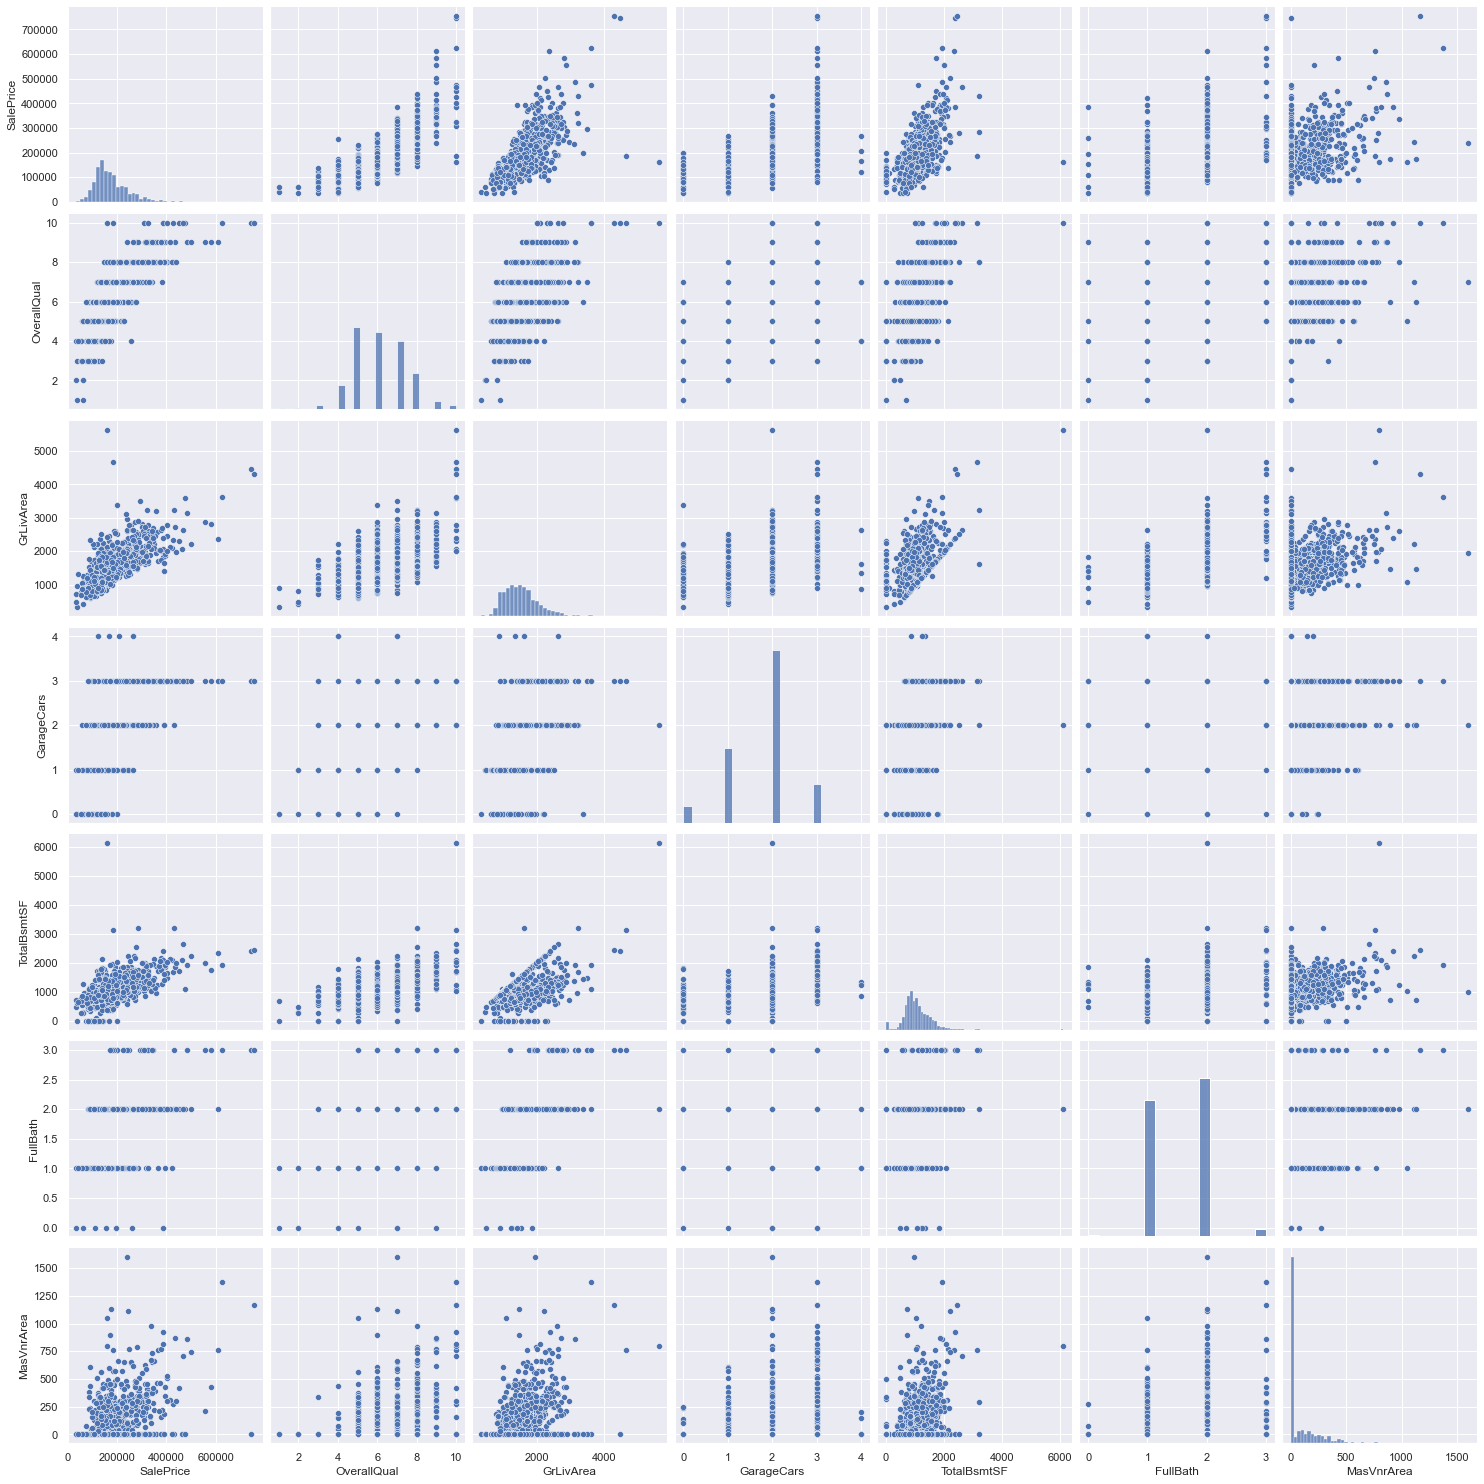

In [65]:
columns = ['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','MasVnrArea']
sns.pairplot(data[columns], size=3)
plt.show()


From the pairplot, we can see few observations:

TotalBasementSF, GrLivingArea & OverallQual are linearly correlated with SalePrice

TotalBasementSF and GrLivingArea have a positive correlation

Distribution of MasVnrArea is skewed to the right


# Data Preparation

In [66]:
# Getting categorical variables
cat_var = data.select_dtypes(include='object').columns
print(len(cat_var))


33


Create OHE (One-Hot Encoding) for categorical columns

In [67]:
data_categorical = data.select_dtypes(include='object')


In [68]:
data_categorical.columns.shape


(33,)

In [69]:
# One Hot Encoding on categorical columns
data_dummies = pd.get_dummies(data_categorical, drop_first=True)


In [70]:
data_dummies.head()


,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


Dropping the original categorical columns from the dataframe

In [71]:
data.drop(list(data_categorical.columns), axis=1, inplace=True)


In [72]:
data.shape


(1168, 32)

Merge data and data_dummies dataframes

In [73]:
data = pd.concat([data, data_dummies], axis=1)


In [74]:
data.head(10)


,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,120,4928,6,5,0.0,120,0,958,1078,958,...,0,0,0,0,1,0,0,0,1,0
1,20,15865,8,6,0.0,351,823,1043,2217,2217,...,0,0,0,0,1,0,0,0,1,0
2,60,9920,7,5,0.0,862,0,255,1117,1127,...,0,0,0,0,1,0,0,0,1,0
3,20,11751,6,6,480.0,705,0,1139,1844,1844,...,0,0,0,0,0,0,0,0,1,0
4,20,16635,6,7,126.0,1246,0,356,1602,1602,...,0,0,0,0,1,0,0,0,1,0
5,60,14054,7,5,0.0,0,0,879,879,879,...,0,0,1,0,0,0,0,0,0,1
6,20,11341,5,6,180.0,1302,0,90,1392,1392,...,0,0,0,0,1,0,0,0,1,0
7,20,13125,5,4,67.0,168,682,284,1134,1803,...,0,0,0,0,1,0,0,0,1,0
8,20,9170,5,7,0.0,698,96,420,1214,1214,...,0,0,0,0,1,0,0,0,1,0
9,50,8480,5,5,0.0,442,0,390,832,832,...,0,0,0,0,0,0,0,0,0,0


In [75]:
X = data.drop(['SalePrice','Transformed_SalePrice'], axis=1)
y = data['Transformed_SalePrice']


In [76]:
X.head()


,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,120,4928,6,5,0.0,120,0,958,1078,958,...,0,0,0,0,1,0,0,0,1,0
1,20,15865,8,6,0.0,351,823,1043,2217,2217,...,0,0,0,0,1,0,0,0,1,0
2,60,9920,7,5,0.0,862,0,255,1117,1127,...,0,0,0,0,1,0,0,0,1,0
3,20,11751,6,6,480.0,705,0,1139,1844,1844,...,0,0,0,0,0,0,0,0,1,0
4,20,16635,6,7,126.0,1246,0,356,1602,1602,...,0,0,0,0,1,0,0,0,1,0


In [77]:
y.head()


0    11.759786
1    12.498742
2    12.505399
3    12.154779
4    12.278393
Name: Transformed_SalePrice, dtype: float64

# Spliting data into train and test sets


In [78]:
# Import library from sklearn from train, test & split
from sklearn.model_selection import train_test_split


In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [80]:
print(X_train.shape)
print(y_train.shape)


(817, 212)
(817,)


In [81]:
print(X_test.shape)
print(y_test.shape)


(351, 212)
(351,)


In [82]:
data.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 214 columns):
 #    Column                 Non-Null Count  Dtype  
---   ------                 --------------  -----  
 0    MSSubClass             1168 non-null   int64  
 1    LotArea                1168 non-null   int64  
 2    OverallQual            1168 non-null   int64  
 3    OverallCond            1168 non-null   int64  
 4    MasVnrArea             1168 non-null   float64
 5    BsmtFinSF1             1168 non-null   int64  
 6    BsmtFinSF2             1168 non-null   int64  
 7    BsmtUnfSF              1168 non-null   int64  
 8    TotalBsmtSF            1168 non-null   int64  
 9    1stFlrSF               1168 non-null   int64  
 10   2ndFlrSF               1168 non-null   int64  
 11   GrLivArea              1168 non-null   int64  
 12   BsmtFullBath           1168 non-null   int64  
 13   BsmtHalfBath           1168 non-null   int64  
 14   FullBath               1168 non-null  

### Applying MinMax scaling on numerical features (excluding dummified columns)

In [83]:
# Getting numerical variables
num_var = X_train.select_dtypes(include=['int64', 'float64']).columns
print(len(num_var))
num_var


30


Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'MoSold', 'Age_Built_Years', 'Age_RemodAdd_Years',
       'Age_GarageYrBlt_Years', 'Age_YrSold_Years'],
      dtype='object')

In [84]:
# Import library for MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate an object of MinMaxScaler
sc = MinMaxScaler()

# Perform fit and transform on the train dataset
X_train[num_var] = sc.fit_transform(X_train[num_var])

# Perform only transform on the test dataset
X_test[num_var] = sc.transform(X_test[num_var])


In [85]:
print(X_train.shape)
print(X_test.shape)


(817, 212)
(351, 212)


### Modeling using Linear Regression

### Building base model

In [86]:
from sklearn.model_selection import KFold,cross_val_score


In [87]:
#importing models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score,confusion_matrix,classification_report


In [88]:
#Choosing the best random state using Logistic regression
def randomstate(a,b):
    maxx=1000
    for state in range(1,201):
        xtrain,xtest,ytrain,ytest=train_test_split(a,b,test_size=0.25,random_state=state)
        model=LinearRegression()
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        mse=mean_squared_error(p,ytest)
        if maxx>mse:
            maxx=mse
            j=state
    return j

In [89]:
#Creating list of models and another list mapped to their names
models=[KNeighborsRegressor(),SVR(),LinearRegression(),Lasso(),Ridge(),DecisionTreeRegressor(),
       RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]

names=['KNeighborsRegressor','SVR','LinearRegression','Lasso','Ridge','DecisionTreeRegressor',
       'RandomForestRegressor','AdaBoostRegressor','GradientBoostingRegressor']

In [90]:
def createmodels(model_list,independent,dependent,n):
    xtrain,xtest,ytrain,ytest=train_test_split(independent,dependent,test_size=0.25,random_state=randomstate(independent,dependent))
    name=[]
    meanabs=[]
    meansqd=[]
    rootmeansqd=[]
    r2=[]
    mcv=[]
    
    #Creating models
    for i,model in enumerate(model_list):
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        score=cross_val_score(model,independent,dependent,cv=10)
        
        #Calculating scores of the model and appending them to a list
        name.append(n[i])
        meanabs.append(np.round(mean_absolute_error(p,ytest),4))
        meansqd.append(np.round(mean_squared_error(p,ytest),4))
        rootmeansqd.append(np.round(np.sqrt(mean_squared_error(p,ytest)),4))
        r2.append(np.round(r2_score(p,ytest),2))
        mcv.append(np.round(np.mean(score),4))
    
    #Creating Dataframe
    data=pd.DataFrame()
    data['Model']=name
    data['Mean Absolute Error']=meanabs
    data['Mean Squared Error']=meansqd
    data['Root Mean Squared Error']=rootmeansqd
    data['R2 Score']=r2
    data['Mean of Cross validaton Score']=mcv
    data.set_index('Model',inplace = True)
    return data

In [91]:
createmodels(models,X,y,names)


,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Mean of Cross validaton Score
Model,,,,,
KNeighborsRegressor,0.1510,0.0440,0.2097,0.43,0.6587
SVR,0.1427,0.0377,0.1943,0.51,0.7235
LinearRegression,0.0950,0.0160,0.1266,0.86,0.8359
Lasso,0.1164,0.0245,0.1567,0.70,0.7115
Ridge,0.0914,0.0145,0.1205,0.88,0.8486
DecisionTreeRegressor,0.1505,0.0503,0.2243,0.63,0.7186
RandomForestRegressor,0.0894,0.0149,0.1222,0.86,0.8578
AdaBoostRegressor,0.1209,0.0238,0.1541,0.81,0.7989
GradientBoostingRegressor,0.0862,0.0133,0.1153,0.89,0.8750


In [92]:
from sklearn.model_selection import RandomizedSearchCV


In [93]:
params={'n_estimators':[100, 300, 500],
        'min_samples_split':[1,2,3,4],
        'min_samples_leaf':[1,2,3,4],
            'max_depth':[None,1,2,3,4,5,6,7,8]}

In [94]:
g=RandomizedSearchCV(RandomForestRegressor(),params,cv=10)


In [95]:
g.fit(X_train,y_train)


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7,
                                                      8],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [1, 2, 3, 4],
                                        'n_estimators': [100, 300, 500]})

In [96]:
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)

RandomForestRegressor(min_samples_split=4)
{'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': None}
0.8531591300222324


In [97]:
m=RandomForestRegressor(max_depth=8, min_samples_leaf=3, min_samples_split=3,n_estimators=100)
m.fit(X_train,y_train)
p=m.predict(X_test)
score=cross_val_score(m,X,y,cv=10)

In [98]:
print('Mean Absolute Error is',np.round(mean_absolute_error(p,y_test),4))
print('Mean Squared Error is',np.round(mean_squared_error(p,y_test),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,y_test)),4))
print('R2 Score is',np.round(r2_score(p,y_test),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 0.1096
Mean Squared Error is 0.0276
Root Mean Squared Error is 0.166
R2 Score is 78.4
Mean of cross validaton Score is 85.1237


In [99]:
# From statsmodels importing variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm


In [100]:
# Functions to build model using statsmodels and check VIF
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [101]:
X_train_new = build_model(X_train,y_train)


                              OLS Regression Results                             
Dep. Variable:     Transformed_SalePrice   R-squared:                       0.932
Model:                               OLS   Adj. R-squared:                  0.909
Method:                    Least Squares   F-statistic:                     41.65
Date:                   Tue, 27 Dec 2022   Prob (F-statistic):          6.00e-265
Time:                           16:30:58   Log-Likelihood:                 697.60
No. Observations:                    817   AIC:                            -991.2
Df Residuals:                        615   BIC:                            -40.66
Df Model:                            201                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [102]:
HighVIF = checkVIF(X_train_new)


In [103]:
HighVIF[ HighVIF['VIF'] >=5 ]


,Features,VIF
158,BsmtFinType2_None,inf
142,BsmtCond_None,inf
195,GarageCond_None,inf
190,GarageQual_None,inf
185,GarageFinish_None,inf
...,...,...
159,BsmtFinType2_Rec,5.23
61,Neighborhood_NoRidge,5.22
154,BsmtFinType1_Unf,5.21
95,Exterior1st_AsphShn,5.20


In [104]:
highVIF_columns = list(HighVIF[ HighVIF['VIF'] >=5 ].Features.values)


In [105]:
len(highVIF_columns)


114

In [106]:
highVIF_columns.remove('const')


In [107]:
len(highVIF_columns)


113

In [108]:
highVIF_columns


['BsmtFinType2_None',
 'BsmtCond_None',
 'GarageCond_None',
 'GarageQual_None',
 'GarageFinish_None',
 'GarageType_None',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtQual_None',
 'BsmtFinType1_None',
 'BsmtExposure_None',
 'Exterior1st_VinylSd',
 'Exterior2nd_VinylSd',
 'Exterior1st_HdBoard',
 'Exterior1st_MetalSd',
 'Exterior2nd_HdBoard',
 'Exterior2nd_MetalSd',
 'Exterior1st_Wd Sdng',
 'GrLivArea',
 'Exterior2nd_Wd Sdng',
 'Exterior2nd_Plywood',
 'GarageCond_TA',
 '2ndFlrSF',
 '1stFlrSF',
 'Exterior1st_Plywood',
 'ExterCond_TA',
 'GarageQual_TA',
 'GarageType_Attchd',
 'ExterCond_Gd',
 'Exterior1st_CemntBd',
 'Exterior2nd_CmentBd',
 'GarageType_Detchd',
 'Exterior1st_BrkFace',
 'Exterior2nd_Wd Shng',
 'SaleType_New',
 'SaleCondition_Partial',
 'GarageCond_Fa',
 'Exterior1st_WdShing',
 'GarageQual_Fa',
 'Exterior1st_Stucco',
 'MSZoning_RL',
 'Exterior2nd_Stucco',
 'RoofStyle_Gable',
 'RoofStyle_Hip',
 'MasVnrType_None',
 'GarageType_BuiltIn',
 'MasVnrType_BrkFace

In [109]:
X_train_new.shape


(817, 213)

In [110]:
X_train_new.drop(highVIF_columns, axis=1, inplace=True)


In [111]:
X_train_new.shape


(817, 100)

In [112]:
X_train_new.head()


,const,LotArea,OverallCond,MasVnrArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Oth,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
593,1.0,0.036117,0.875,0.000000,0.333333,0.0,0.333333,0.0,0.500000,0.000000,...,0,0,0,0,0,0,0,0,0,1
788,1.0,0.054707,0.500,0.000000,0.000000,0.0,0.666667,0.0,0.500000,0.333333,...,0,0,0,0,0,0,0,0,0,0
490,1.0,0.049431,0.500,0.358125,0.333333,0.0,0.666667,0.5,0.500000,0.000000,...,0,0,0,0,0,0,0,0,0,1
654,1.0,0.047649,0.500,0.000000,0.333333,0.0,0.333333,0.0,0.666667,0.333333,...,0,0,0,0,0,0,0,0,0,1
963,1.0,0.042177,0.625,0.000000,0.333333,0.0,0.333333,0.0,0.500000,0.333333,...,0,0,0,0,0,0,0,0,0,1


In [113]:
#Choosing the best random state using Logistic regression
def randomstate(a,b):
    maxx=1000
    for state in range(1,201):
        xtrain_new,xtest,ytrain,ytest=train_test_split(a,b,test_size=0.25,random_state=state)
        model=LinearRegression()
        model.fit(xtrain_new,ytrain)
        p=model.predict(xtest)
        mse=mean_squared_error(p,ytest)
        if maxx>mse:
            maxx=mse
            j=state
    return j

In [114]:
def createmodels(model_list,independent,dependent,n):
    xtrain_new,xtest,ytrain,ytest=train_test_split(independent,dependent,test_size=0.25,random_state=randomstate(independent,dependent))
    name=[]
    meanabs=[]
    meansqd=[]
    rootmeansqd=[]
    r2=[]
    mcv=[]
    
    #Creating models
    for i,model in enumerate(model_list):
        model.fit(xtrain_new,ytrain)
        p=model.predict(xtest)
        score=cross_val_score(model,independent,dependent,cv=10)
        
        #Calculating scores of the model and appending them to a list
        name.append(n[i])
        meanabs.append(np.round(mean_absolute_error(p,ytest),4))
        meansqd.append(np.round(mean_squared_error(p,ytest),4))
        rootmeansqd.append(np.round(np.sqrt(mean_squared_error(p,ytest)),4))
        r2.append(np.round(r2_score(p,ytest),2))
        mcv.append(np.round(np.mean(score),4))
    
    #Creating Dataframe
    data=pd.DataFrame()
    data['Model']=name
    data['Mean Absolute Error']=meanabs
    data['Mean Squared Error']=meansqd
    data['Root Mean Squared Error']=rootmeansqd
    data['R2 Score']=r2
    data['Mean of Cross validaton Score']=mcv
    data.set_index('Model',inplace = True)
    return data

In [115]:
createmodels(models,X,y,names)


,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Mean of Cross validaton Score
Model,,,,,
KNeighborsRegressor,0.1510,0.0440,0.2097,0.43,0.6587
SVR,0.1427,0.0377,0.1943,0.51,0.7235
LinearRegression,0.0950,0.0160,0.1266,0.86,0.8359
Lasso,0.1164,0.0245,0.1567,0.70,0.7115
Ridge,0.0914,0.0145,0.1205,0.88,0.8486
DecisionTreeRegressor,0.1479,0.0439,0.2095,0.69,0.7173
RandomForestRegressor,0.0901,0.0156,0.1248,0.86,0.8565
AdaBoostRegressor,0.1188,0.0243,0.1560,0.80,0.7927
GradientBoostingRegressor,0.0860,0.0135,0.1161,0.89,0.8731


Finalizing and saving the Random Forest Model as it is showing the r2 score 86% and error is also less .

Text(0.5, 1.0, 'Random forest')

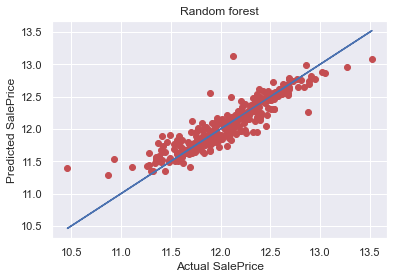

In [118]:
plt.scatter(x=y_test,y=p,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Random forest')

In [119]:
final_model=RandomForestRegressor(max_depth=8, min_samples_leaf=3, min_samples_split=3,n_estimators=100)
final_model.fit(X_train,y_train)
p=final_model.predict(X_test)
score=cross_val_score(final_model,X,y,cv=10)

In [120]:
import joblib

In [121]:
#saving the model:
joblib.dump(final_model,'Sale Price_prediction project')

['Sale Price_prediction project']